In [1]:
import matplotlib.pyplot as plt
from opportunity_preprocess import opportunityLoader
from doore_preprocess import dooreLoader
from casas_preprocess import casasLoader
from aras_preprocess import arasLoader
from openpack_preprocess import openpackLoader

# Assume the following datasets already loaded
dataset1 = opportunityLoader('../data/opportunity/*.dat', timespan=1000, min_seq=10)
dataset2 = dooreLoader('../data/doore/*.csv', timespan=10000, min_seq=10)
dataset3 = casasLoader('../data/casas/*.txt', min_seq=10)
dataset4 = arasLoader('../data/aras/HouseA/*.txt', timespan=1000, min_seq=10)
dataset5 = openpackLoader('../data/openpack/*.csv', timespan=100, min_seq=10)

Processing: ../data/opportunity/S1-ADL1.dat
Processing: ../data/opportunity/S1-ADL2.dat
Processing: ../data/opportunity/S1-ADL3.dat
Processing: ../data/opportunity/S1-ADL4.dat
Processing: ../data/opportunity/S1-ADL5.dat
Processing: ../data/opportunity/S1-Drill.dat
Processing: ../data/opportunity/S2-ADL1.dat
Processing: ../data/opportunity/S2-ADL2.dat
Processing: ../data/opportunity/S2-ADL3.dat
Processing: ../data/opportunity/S2-ADL4.dat
Processing: ../data/opportunity/S2-ADL5.dat
Processing: ../data/opportunity/S2-Drill.dat
Processing: ../data/opportunity/S3-ADL1.dat
Processing: ../data/opportunity/S3-ADL2.dat
Processing: ../data/opportunity/S3-ADL3.dat
Processing: ../data/opportunity/S3-ADL4.dat
Processing: ../data/opportunity/S3-ADL5.dat
Processing: ../data/opportunity/S3-Drill.dat
Processing: ../data/opportunity/S4-ADL1.dat
Processing: ../data/opportunity/S4-ADL2.dat
Processing: ../data/opportunity/S4-ADL3.dat
Processing: ../data/opportunity/S4-ADL4.dat
Processing: ../data/opportuni

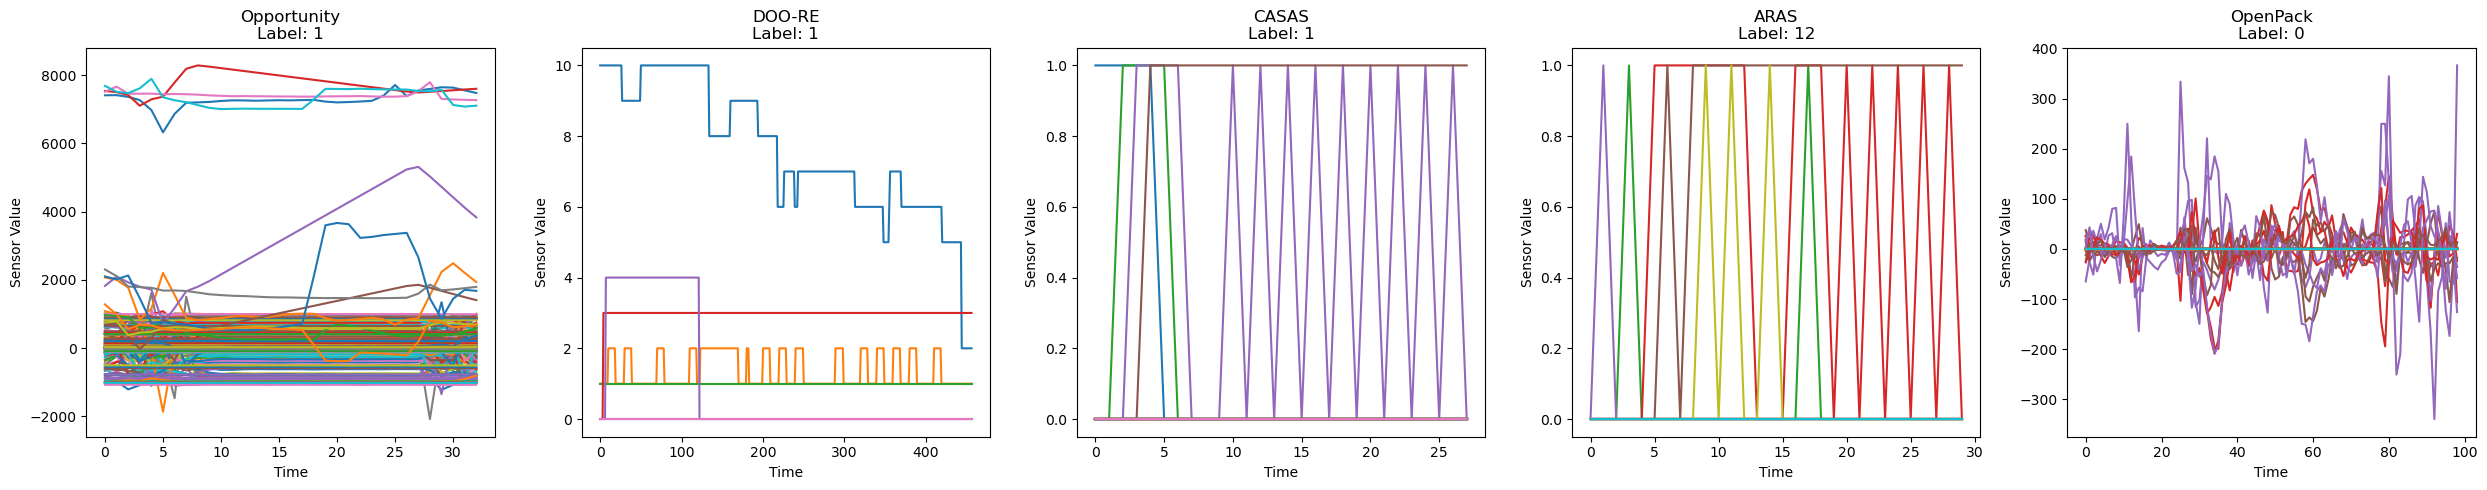

<Figure size 640x480 with 0 Axes>

In [2]:
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5]
dataset_names = ['Opportunity', 'DOO-RE', 'CASAS', 'ARAS', 'OpenPack']

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for idx, (dataset, name) in enumerate(zip(datasets, dataset_names)):
    sample = dataset[0]  # First sequence from each dataset
    seq_data = sample.data  # Shape: [length, channels]
    length = sample.length
    label = sample.label
    user_id = getattr(sample, 'user_id', None)

    # Select first 3 sensor channels for visualization
    selected_channels = seq_data[:, :]

    ax = axes[idx]
    for ch in range(selected_channels.shape[1]):
        ax.plot(range(length), selected_channels[:, ch], label=f'Ch {ch+1}')
    
    title_str = f"{name}\nLabel: {label}"
    #if user_id is not None:
    #    title_str += f", User: {user_id}"
    ax.set_title(title_str)
    ax.set_xlabel("Time")
    ax.set_ylabel("Sensor Value")
    #ax.legend()

plt.tight_layout()
plt.show()
plt.savefig("dataset_vis.png", dpi=300, bbox_inches='tight')

UnboundLocalError: local variable 'padded_tensor' referenced before assignment

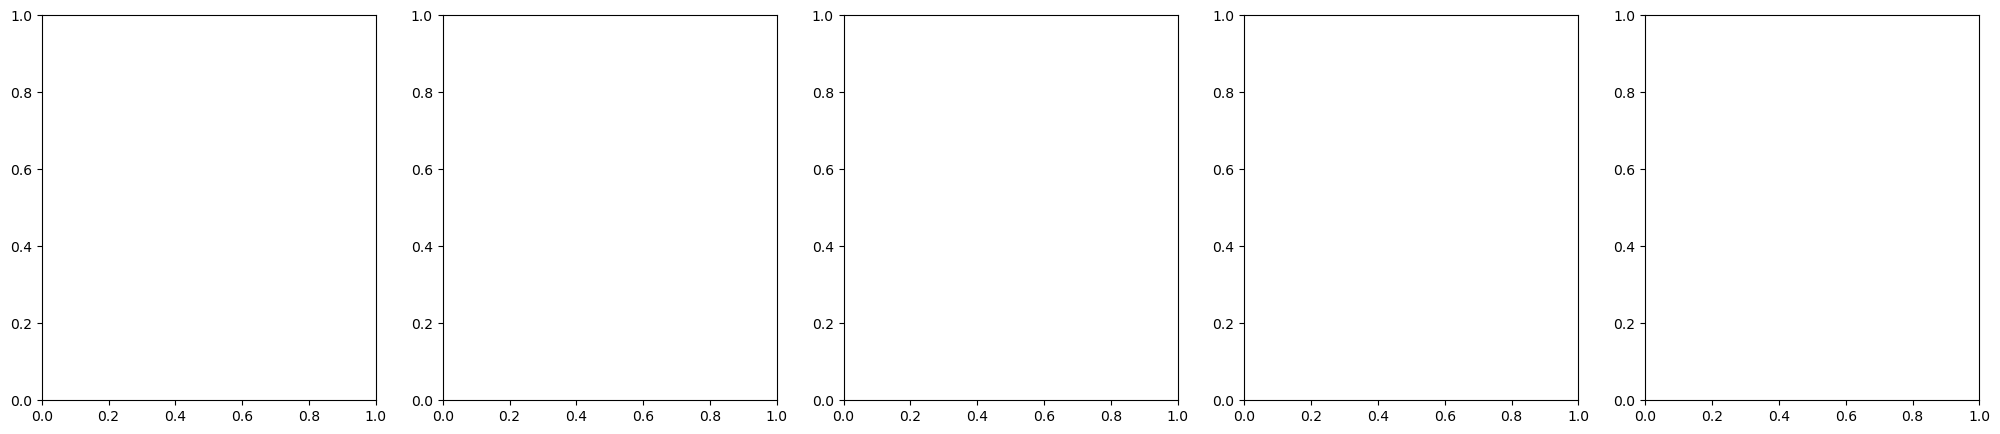

In [ ]:
from collections import Counter
import logging
import matplotlib.pyplot as plt
from data_preprocess import preprocess_dataset

# Assumption: 'args' object and 'preprocess_dataset' function are defined
# Example: args.min_samples = 5

datasets = [dataset1, dataset2, dataset3, dataset4, dataset5]
dataset_names = ['Opportunity', 'DOO-RE', 'CASAS', 'ARAS', 'OpenPack']
min_samples = 20
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for idx, (dataset_raw, name) in enumerate(zip(datasets, dataset_names)):
    dataset_list = dataset_raw

    # 2. Filter classes by minimum number of sequences
    if min_samples > 0:
        raw_labels = [seq.label for seq in dataset_list]
        counts = Counter(raw_labels)
        valid_labels = {label for label, count in counts.items() if count >= min_samples}
        dataset_list = [seq for seq in dataset_list if seq.label in valid_labels]
        logging.info(f"[{name} - Filter] Classes ≥ {min_samples}: {sorted(valid_labels)}")

        # Log dataset statistics after filtering
        filtered_counts = Counter(seq.label for seq in dataset_list)
        total_sequences_filtered = sum(filtered_counts.values())
        total_pointers_filtered = sum(seq.length for seq in dataset_list)
        logging.info(f"[{name} - After Filter] Total sequences: {total_sequences_filtered}")
        logging.info(f"[{name} - After Filter] Total data points: {total_pointers_filtered}")
        for label in sorted(filtered_counts.keys()):
            count = filtered_counts[label]
            total_points = sum(seq.length for seq in dataset_list if seq.label == label)
            logging.info(f"  Activity {label}: {count} sequences, {total_points} data points")

    # 3. Normalize and relabel sequences (no augmentation or padding)
    normalized_seqs, label_list, label_map = preprocess_dataset(
        dataset_list,
        padding_type=None,
        augment_method=None
    )

    # 4. Visualize the first preprocessed sequence
    # Extract first preprocessed sequence
    seq_data = normalized_seqs[0]  # Tensor: [length, channels]
    label = label_list[0]          # Scalar or tensor
    length = seq_data.shape[0]     # Length from tensor shape

    ax = axes[idx]
    for ch in range(seq_data.shape[1]):
        ax.plot(range(length), seq_data[:, ch].cpu().numpy(), label=f'Ch {ch+1}')  # Convert to NumPy if needed

    title_str = f"{name}\nLabel: {label}"
    # Uncomment below if user_id is available and needs to be shown
    # if user_id is not None:
    #     title_str += f", User: {user_id}"
    ax.set_title(title_str)
    ax.set_xlabel("Time")
    ax.set_ylabel("Sensor Value")
    # Uncomment to show channel legends
    # ax.legend()

plt.tight_layout()
plt.show()
plt.savefig("dataset_vis.png", dpi=300, bbox_inches='tight')

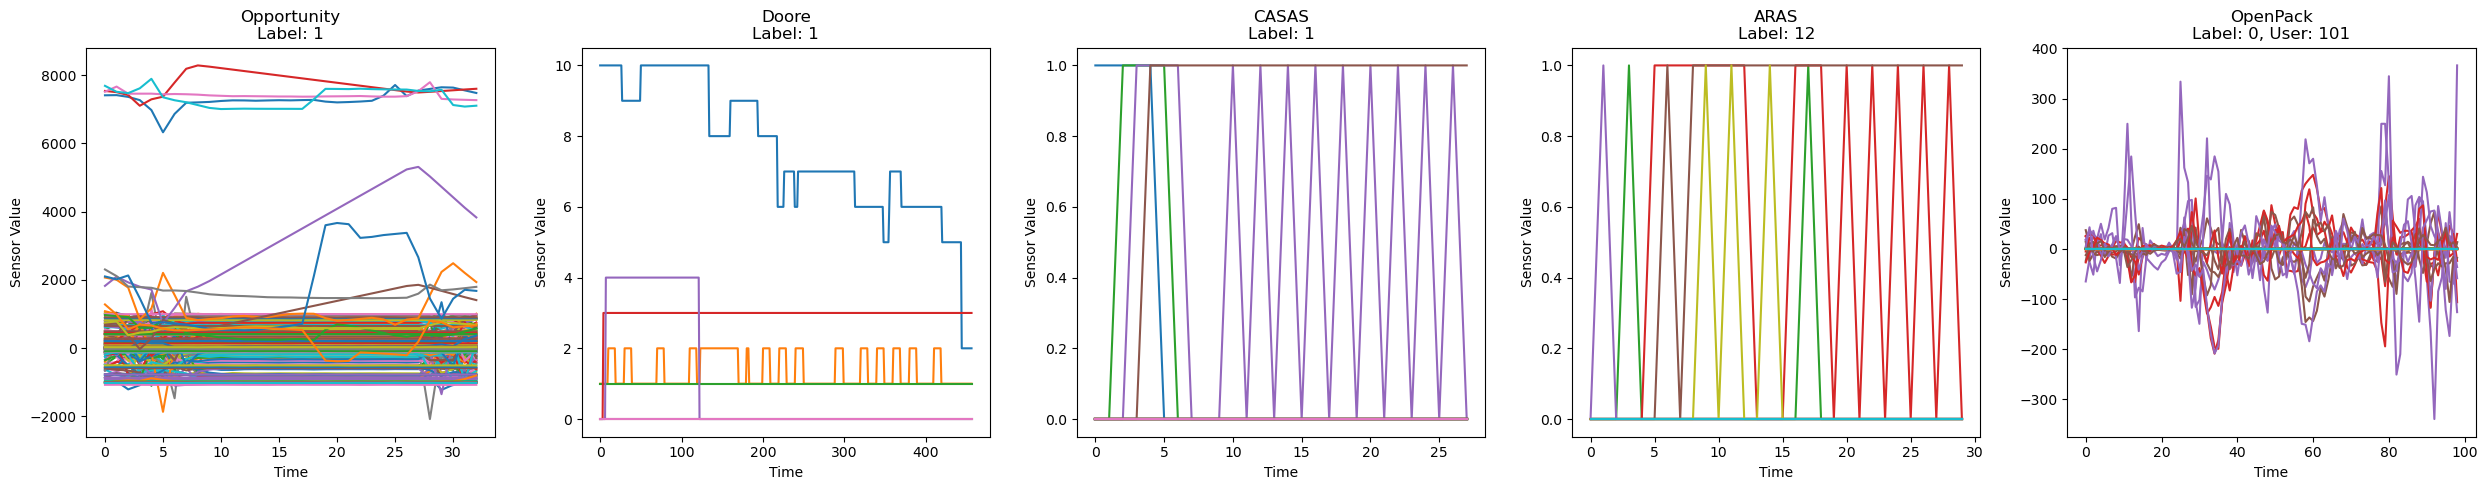

<Figure size 640x480 with 0 Axes>

In [5]:

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for idx, (dataset, name) in enumerate(zip(datasets, dataset_names)):
    sample = dataset[0]  # First sequence from each dataset
    seq_data = sample.data  # Shape: [length, channels]
    length = sample.length
    label = sample.label
    user_id = getattr(sample, 'user_id', None)

    # Select first 3 sensor channels for visualization
    selected_channels = seq_data[:, :]

    ax = axes[idx]
    for ch in range(selected_channels.shape[1]):
        ax.plot(range(length), selected_channels[:, ch], label=f'Ch {ch+1}')
    
    title_str = f"{name}\nLabel: {label}"
    if user_id is not None:
        title_str += f", User: {user_id}"
    ax.set_title(title_str)
    ax.set_xlabel("Time")
    ax.set_ylabel("Sensor Value")
    #ax.legend()

plt.tight_layout()
plt.show()
plt.savefig("dataset_vis.png", dpi=300, bbox_inches='tight')

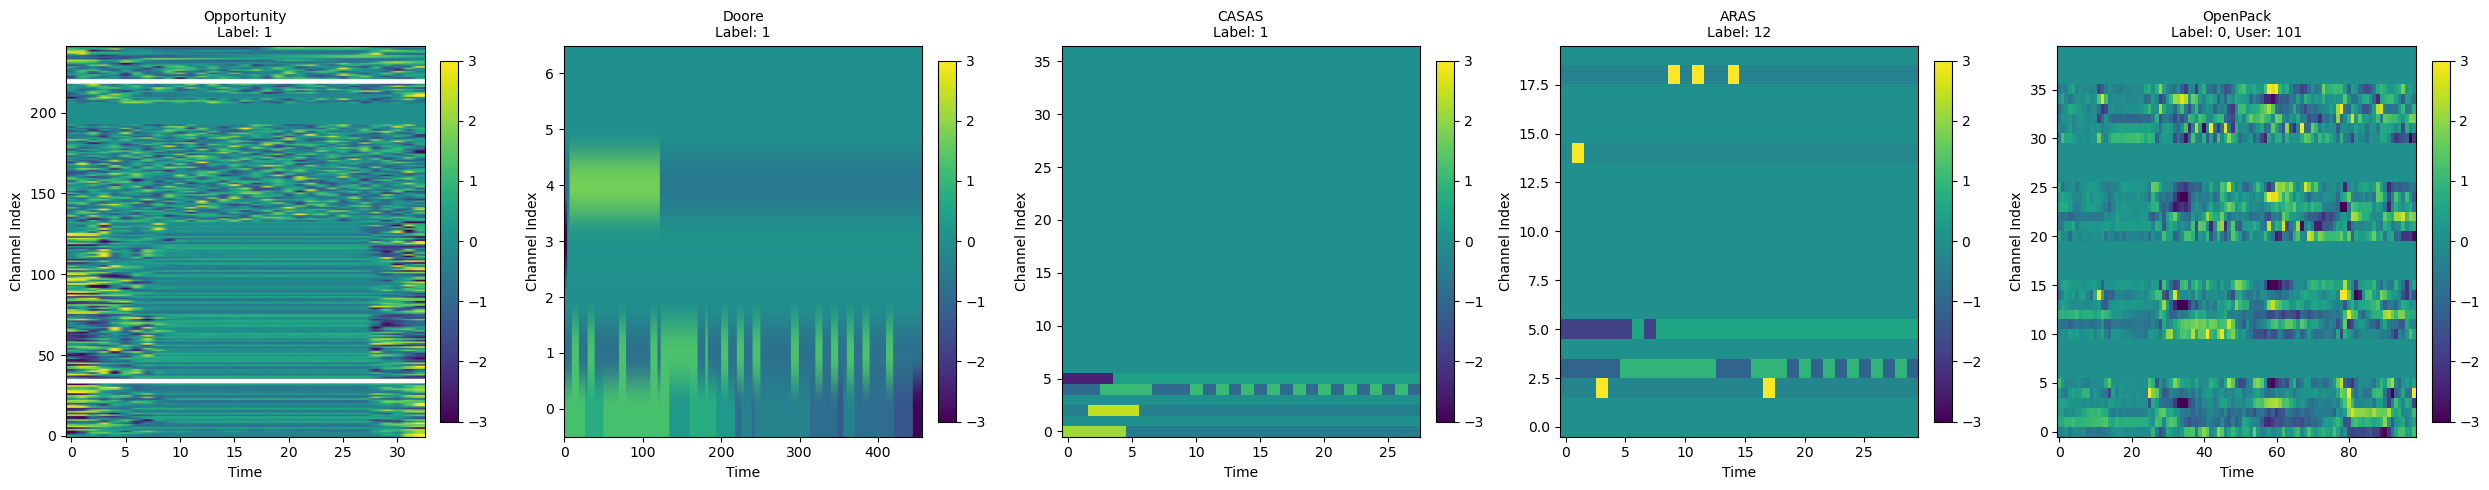

In [ ]:
# z-score normalization
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for idx, (dataset, name) in enumerate(zip(datasets, dataset_names)):
    sample = dataset[0]
    seq_data = sample.data  # shape: [length, channels]

    # Channel-wise Z-score normalization
    seq_mean = seq_data.mean(axis=0)
    seq_std = seq_data.std(axis=0)
    seq_norm = (seq_data - seq_mean) / (seq_std + 1e-8)

    label = sample.label
    user_id = getattr(sample, 'user_id', None)

    ax = axes[idx]
    im = ax.imshow(seq_norm.T, aspect='auto', cmap='viridis', origin='lower')

    title_str = f"{name}\nLabel: {label}"
    if user_id is not None:
        title_str += f", User: {user_id}"
    ax.set_title(title_str, fontsize=10)
    ax.set_xlabel("Time")
    ax.set_ylabel("Channel Index")

    # Optional: fix color scale across all plots for comparison
    im.set_clim(-3, 3)  # Clip color range to [-3σ, 3σ]

    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.savefig("dataset_vis_zscore.png", dpi=300, bbox_inches='tight')
plt.show()


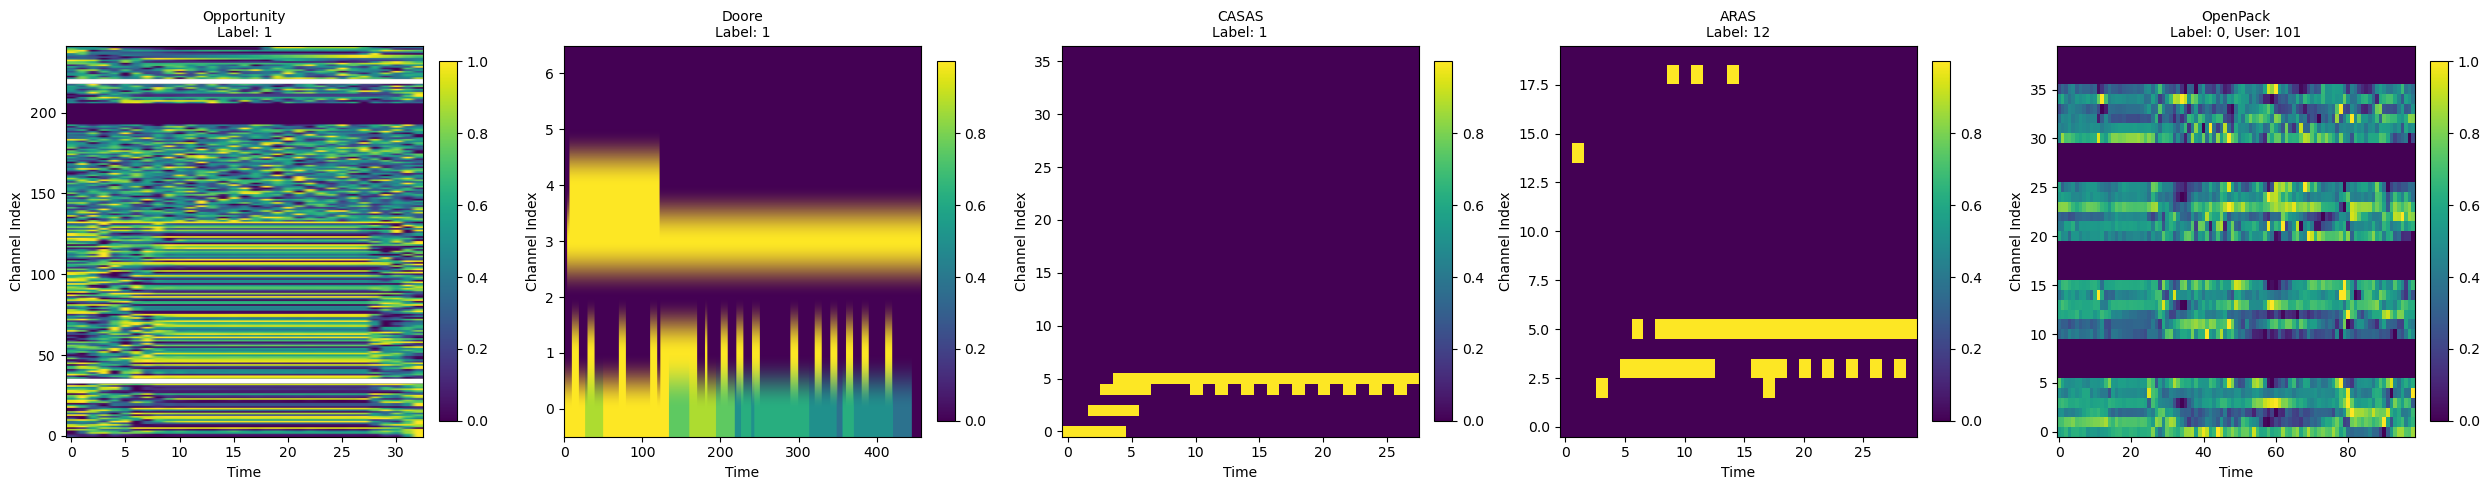

In [11]:
# Min-Max normalization
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for idx, (dataset, name) in enumerate(zip(datasets, dataset_names)):
    sample = dataset[0]
    seq_data = sample.data  # shape: [length, channels]

    # Channel-wise Min-Max normalization (per sequence)
    seq_min = seq_data.min(axis=0)
    seq_max = seq_data.max(axis=0)
    seq_norm = (seq_data - seq_min) / (seq_max - seq_min + 1e-8)

    label = sample.label
    user_id = getattr(sample, 'user_id', None)

    ax = axes[idx]
    im = ax.imshow(seq_norm.T, aspect='auto', cmap='viridis', origin='lower')

    title_str = f"{name}\nLabel: {label}"
    if user_id is not None:
        title_str += f", User: {user_id}"
    ax.set_title(title_str, fontsize=10)
    ax.set_xlabel("Time")
    ax.set_ylabel("Channel Index")

    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.savefig("dataset_vis_normalized.png", dpi=300, bbox_inches='tight')
plt.show()
